In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

from funciones import* 
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [2]:
from main import *

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df3.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,-0.005341,0.004089,0.003771,0.000735,-0.006660,-0.005483,0.004383,0.007954,0.004593,-0.003470
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,0.000954,-0.004517,0.000147,-0.000657,0.001618,0.003566,-0.002742,0.001740,-0.002151,0.002551
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,-0.000162,0.000340,0.000186,0.001135,-0.001117,-0.002063,0.000696,-0.000877,-0.001132,-0.001703
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,-0.000130,-0.001925,-0.000452,0.000100,-0.000518,0.000277,-0.001247,0.000605,0.000556,0.000978
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,0.000683,0.001150,-0.000758,0.000297,0.000357,0.000909,0.000692,-0.000217,-0.001372,0.001382


In [4]:
Counter(df3['label'])

Counter({0: 46270, 1: 5376})

In [7]:
X_balanceado
y_balanceado


'''X = df3.drop(columns=['id_producto','label'], axis=1) # creamos la variables independientes
y = df3['label']  # creamos la variable dependiente

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_balanceado, y_balanceado = oversampling.fit_resample(X, y) #Se obtienen nuevos X e y

'''
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado, y_balanceado, test_size=0.33, random_state=42)

Counter(y_balanceado)

Counter({0: 46270, 1: 13881})

In [8]:
clf = LogisticRegression(
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    n_jobs=-1,
    verbose=1) # la forma del GD
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 53.0min finished


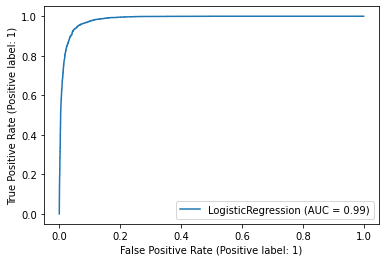

Train AUC 0.9880337660002239
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     31072
           1       0.93      0.83      0.88      9229

    accuracy                           0.95     40301
   macro avg       0.94      0.91      0.92     40301
weighted avg       0.95      0.95      0.95     40301



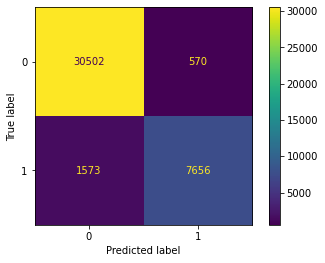

Test AUC 0.9851949324802546
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15198
           1       0.92      0.82      0.87      4652

    accuracy                           0.94     19850
   macro avg       0.94      0.90      0.92     19850
weighted avg       0.94      0.94      0.94     19850



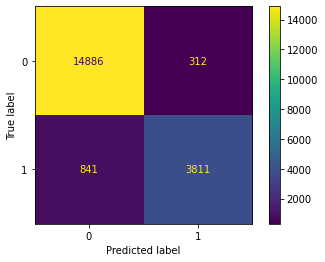

In [43]:
metrics(clf, X_train, X_test, y_train, y_test, thr=0.6)

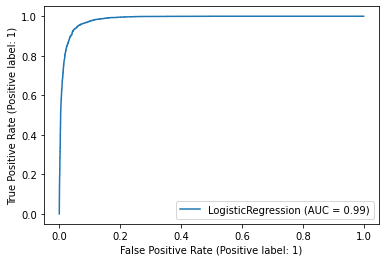

In [44]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()
